In [1]:
import sys
sys.path.append("..")

import numpy as np
from propagation_simulator.environment import environment
from classes.nfpo import NFPO
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize

## 環境設定

In [2]:
frequency = 920.4e6
c = 2.998e8
wave_length = c/frequency
sample_count = 100

## 位相サンプル生成

In [3]:
tag_location= [2,3]
k=-2
antennas_population = 4
antennas_space = 0.1

In [4]:
env = environment(
    antennas_space=antennas_space,
    antennas_population=antennas_population,
    tag=tag_location,
    frequency=frequency,
    k=k,
    sample_count=sample_count,
)
actual_phases1, phases1, phases_with_noise1 = env.get_phases()
antennas = env.antennas

In [5]:
nfpo = NFPO(
    sample_count=sample_count,
    antennas_space=antennas_space,
    phases=env.get_phases()[1],
    antennas_population=antennas_population,
    wave_length = wave_length,
    tag_location = tag_location,
    initial_value = np.array([0,2.5]),
    y_err_range = 1.5,
    x_err_range = 2.0,
    k=k,
    is_noise_included=True,
)

In [6]:
x_list = np.arange(-2,2.1,0.1)
y_list = np.arange(1.0,4.1,0.1)
solve_time_matrix = np.zeros(shape=(x_list.shape[0], y_list.shape[0]))
error_matrix = np.zeros(shape=(x_list.shape[0], y_list.shape[0]))

In [ ]:
for i, x in enumerate(x_list):
    for j, y in enumerate(y_list):
        tag_location = np.array([x,y])
        print(f"tag location : {tag_location}")
        env = environment(
            antennas_space=antennas_space,
            antennas_population=antennas_population,
            tag=tag_location,
            frequency=frequency,
            k=k,
            sample_count=sample_count,
        )
        nfpo.del_component()
        nfpo.renew_parameter(
            phases=env.get_phases()[1],
            tag_location=tag_location,
        )
        result = nfpo.solve(tee=False,time_limit=60)
        solve_time = result["solving_time"]
        error = result["values"]["error"]
        result = [result["values"]["x"], result["values"]["y"]]
        print(f"    error : {error}[m], solve time : {solve_time}[s], obj value = {result["values"]["obj"]}")
        solve_time_matrix[i][j] = solve_time
        error_matrix[i][j] = error

tag location : [-2.  1.]


TypeError: list indices must be integers or slices, not str

In [8]:
np.save("../data/simulation/accuracy_direct_all.npy", error_matrix)
np.save("../data/simulation/solve_time_direct_all.npy", solve_time_matrix)

23.351778127458694
0.08690903368517797


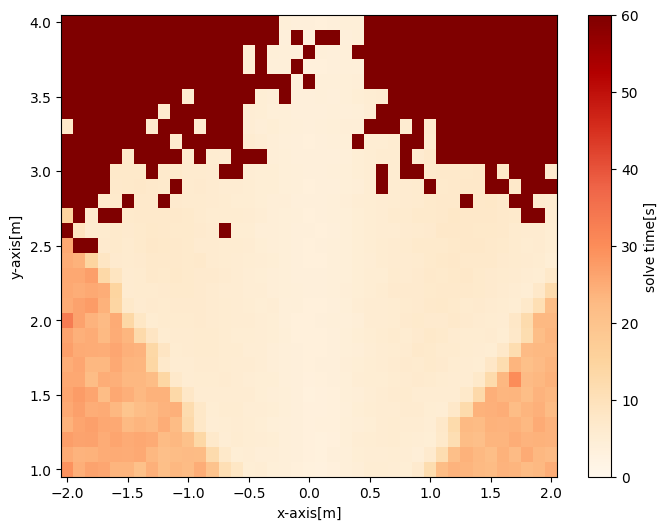

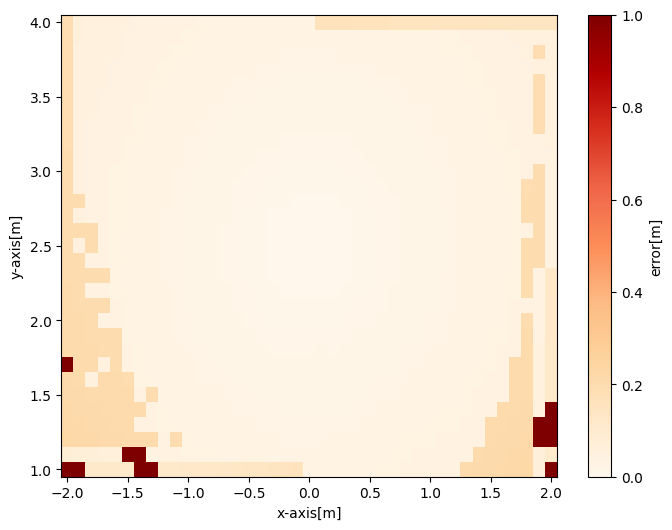

In [ ]:
Y_list, X_list = np.meshgrid(y_list, x_list)
norms = [
    Normalize(vmin=0, vmax=1),
    Normalize(vmin=0, vmax=60)
]

print(solve_time_matrix.mean())
print(error_matrix.mean())

fig, axes = plt.subplots(figsize=(8,6))
mappable = axes.pcolormesh(X_list, Y_list, solve_time_matrix, cmap='OrRd', norm=norms[1])
axes.set_xlabel("x-axis[m]")
axes.set_ylabel("y-axis[m]")
cb=fig.colorbar(mappable, ax=axes)
cb.set_label("solve time[s]")

fig, axes = plt.subplots(figsize=(8,6))
mappable = axes.pcolormesh(X_list, Y_list, error_matrix, cmap='OrRd', norm=norms[0])
axes.set_xlabel("x-axis[m]")
axes.set_ylabel("y-axis[m]")
cb=fig.colorbar(mappable, ax=axes)
cb.set_label("error[m]")